<a href="https://colab.research.google.com/github/KeerHu73/knn/blob/main/assignment/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Predicting a numeric outcome is called regression, and predicting a categorical outcome is called classification.

2. The confusion table is a cross-tabulation of predicted and
actual value. It shows the number of correct and incorrect predictions for each class by comparing the predicted and actual values. The table helps to understand where the model is making mistakes, such as false positives (predicting an event when it did not occur) or false negatives (missing an event that did occur). It is especially useful for evaluating imbalanced classification problems.

3. SES measures the total squared differences between the actual and predicted values. It quantifies how well a regression model fits the data. Lower SSE values indicate that the predictions are closer to the actual values, meaning a better fit.

4. Overfitting occurs when a model learns patterns that are too specific to the training data, including noise, making it perform well on training data but poorly on new data.
Underfitting happens when a model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and test data.


5. splitting the data into training and test sets ensures that the model is evaluated on data it has never seen before. This prevents the model from just memorizing the training data and instead encourages generalization.

6.
*   Predicting a class label:
Strengths: Simple to interpret and use in decision-making.
Weaknesses: Provides no information on uncertainty; a slight change in input may lead to a completely different prediction.

*   Predicting a probability distribution over class labels:
Strengths: Provides more information on confidence levels; useful when making threshold-based decisions (e.g., only classifying when probability is above a certain level).
Weaknesses: More complex to interpret and use in decision-making.




**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

1. Load the data and check for missing values

In [18]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd

url= "https://raw.githubusercontent.com/KeerHu73/knn/refs/heads/main/data/USA_cars_datasets.csv"
df = pd.read_csv(url,low_memory=False)

#print(df.shape)
#print(df.head())

# Keep only the relevant columns
df = df[['price', 'year', 'mileage']]

# Convert year and mileage to numeric to avoid string operations
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

# Drop any rows with NaN values (if conversion resulted in NaN)
df = df.dropna(subset=['year', 'mileage'])

# Check for NA values
print(df.isnull().sum())

# Display dataset dimensions and head
print(df.shape)
print(df.head())


price      0
year       0
mileage    0
dtype: int64
(2499, 3)
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


2. Maxmin normalize year and mileage

In [19]:
# Define max-min normalization function
def maxmin(z):
  w = (z-np.min(z))/(np.max(z)-np.min(z))
  return w

# Apply normalization to year and mileage
df[['year', 'mileage']] = df[['year', 'mileage']].apply(maxmin)

# Display normalized data
print(df.head())


   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


3. Split the sample into ~80% for training and ~20% for evaluation

In [25]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['year', 'mileage']]
y = df['price']

# Ensure X contains only float values
X = df[['year', 'mileage']].astype(float).values
y = df['price'].astype(float).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset sizes
print(X_train.shape, X_test.shape)


(1999, 2) (500, 2)


4. Use the  𝑘 NN algorithm and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300 . For each value of  𝑘 , compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase  𝑘 ?

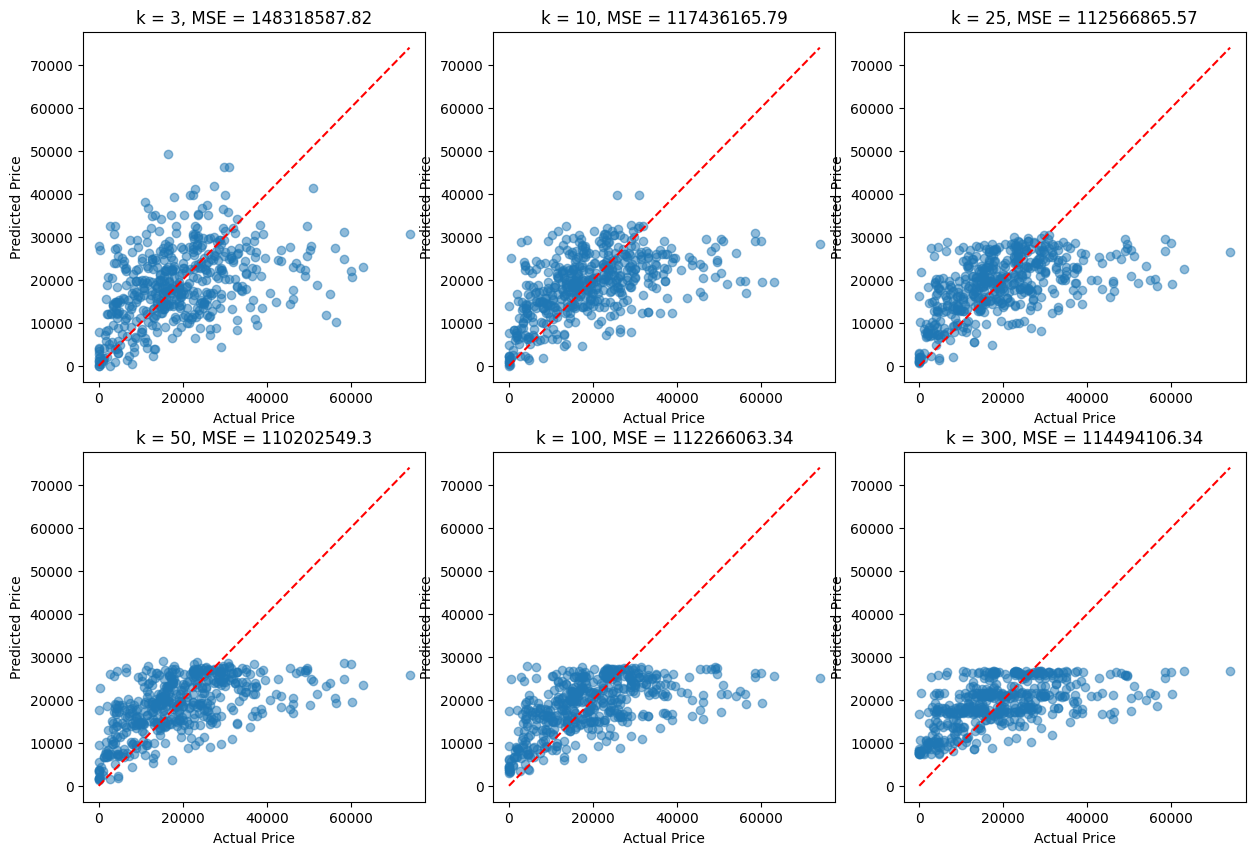

In [29]:
from sklearn.metrics import mean_squared_error
# kNN regression function (following the PDF method)
def knn_regression(x_hat, X_train, y_train, k):
    """
    Implements kNN regression:
    - x_hat: test sample to predict
    - X_train: training data
    - y_train: corresponding price values for training data
    - k: number of nearest neighbors to consider
    """
    distances = []

    # Compute Euclidean distances manually
    for x_train in X_train:
        distance = np.sqrt(np.sum((x_hat - x_train) ** 2))
        distances.append(distance)

    distances = np.array(distances)

    # Find indices of k nearest neighbors
    neighbors_idx = np.argsort(distances)[:k]

    # Compute mean price of k-nearest neighbors
    y_pred = np.mean(y_train[neighbors_idx])

    return y_pred

# Set k values
k_values = [3, 10, 25, 50, 100, 300]
mse_values = []

# Plot results
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    y_preds = []

    # Predict price for each test sample using explicit loops
    for x in X_test:
        y_pred = knn_regression(x, X_train, y_train, k)
        y_preds.append(y_pred)

    y_preds = np.array(y_preds)

    # Compute MSE
    mse = mean_squared_error(y_test, y_preds)
    mse_values.append(mse)

    # Scatter plot of actual vs. predicted prices
    plt.subplot(2, 3, i + 1) #Arrange plots in 2 rows, 3 columns
    plt.scatter(y_test, y_preds, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction reference line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("k = " + str(k) + ", MSE = " + str(round(mse, 2)))


plt.show()



5. Determine the optimal  𝑘  for these data.


In [30]:
optimal_k = k_values[np.argmin(mse_values)]
print("Optimal k value: " + str(optimal_k))


Optimal k value: 50


6.Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

For a small k (e.g. k = 3): The MSE is relatively high, and the distribution of predicted points is quite scattered, indicating that the model is overfitting, having overlearned the training data and thus having poor generalization ability. For a moderate k (e.g. k = 50): The MSE decreases, and the predictions are more stable, suggesting that the model has achieved a balance and has better generalization performance. For a large k (e.g.k = 300): The MSE increases, and all predicted values tend towards the mean, indicating that the model is underfitting, overly smoothing the data and failing to capture the true patterns of the prices.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.